In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import jieba
from collections import Counter
import jieba.posseg as jp
from PIL import Image
from matplotlib import style
import ast
import seaborn as sns
import urllib.request
# from ggplot import *
import os
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [301]:
comments_df = pd.read_csv(r'./data/合并后的评论数据_TOP20.csv')
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5992 non-null   int64  
 1   guid              5992 non-null   object 
 2   content           5992 non-null   object 
 3   creationTime      5992 non-null   object 
 4   isDelete          5992 non-null   bool   
 5   isTop             5992 non-null   bool   
 6   userImageUrl      5992 non-null   object 
 7   topped            5992 non-null   int64  
 8   replyCount        5992 non-null   int64  
 9   score             5992 non-null   int64  
 10  imageStatus       2787 non-null   float64
 11  usefulVoteCount   5992 non-null   int64  
 12  userClient        5992 non-null   int64  
 13  discussionId      2917 non-null   float64
 14  imageCount        2787 non-null   float64
 15  anonymousFlag     5841 non-null   float64
 16  plusAvailable     5992 non-null   int64  


In [302]:
comments_df.head()

,id,guid,content,creationTime,isDelete,isTop,userImageUrl,topped,replyCount,score,...,afterImages,afterVideos,SKU,sales_order,Unnamed: 0,Title,Description,Price,Image,Shop
0,19058365992,3a42ad2b13efd827680b403663445931,第一次在京东买水果，简直了，爱了爱了，包装很好，瓜果没有一点问题，拆开赶紧切了个西瓜?吃，皮...,2023-04-26 16:39:25,False,False,storage.360buyimg.com/i.imageUpload/e6a4e6a4bc...,0,0,5,...,NaN,NaN,100000263813,20,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区
1,19063662891,059df86d69f3033d82473f9a84d925de,西瓜足斤足两，到手后称了一下，将近4千克，很满意。切开后情况很好，瓜瓤很脆，吃起来脆甜脆甜的...,2023-04-28 14:18:46,False,False,storage.360buyimg.com/i.imageUpload/6a645f3433...,0,0,5,...,NaN,NaN,100000263813,20,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区
2,19027508331,aba66f4254a7b5b00f5750729e92e6e7,非常满意的一次购物体验，很甜！西瓜成熟度正好，口感脆甜可口，皮很薄，籽不多，分量足，包装完好...,2023-04-16 17:22:49,False,False,storage.360buyimg.com/i.imageUpload/6a645f6149...,0,1,5,...,NaN,NaN,100000263813,20,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区
3,19025228446,57419ebba5eabdb3035692ae06bb6b63,家里的水果都是京东买的，品质从来没有质疑过，已经是无限次回购的水果，家里人都很喜欢，京东的速...,2023-04-15 20:22:27,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,NaN,NaN,100000263813,20,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区
4,19098655478,b5d4417074b51b2cc41795937e49d610,京东自营商品质量有保证送货速度快，冷链物流送货保证新鲜，还有防撞空气袋特别安全，赶上活动价格...,2023-05-10 12:35:07,False,False,storage.360buyimg.com/i.imageUpload/6c6a737463...,0,0,5,...,NaN,NaN,100000263813,20,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区


In [303]:
# 查看不同评分的评价
comments_df.loc[comments_df.score == 4]

,id,guid,content,creationTime,isDelete,isTop,userImageUrl,topped,replyCount,score,...,afterImages,afterVideos,SKU,sales_order,Unnamed: 0,Title,Description,Price,Image,Shop
133,19089817627,74b99c26170229238a3872524a943e28,包装挺好的，没有磕伤，物流也很快！昨天打开吃了一下！感觉中规中矩，感觉还不错，甜也蛮甜，但还...,2023-05-07 12:56:54,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,4,...,NaN,NaN,100000263813,20,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区
142,19070162247,63108704adc68a8b37a47ec15a80931e,终于吃到了传说中的梦中情瓜，皮比我想象中还要薄！口感不错，脆甜，美中不足的是，气泡柱还需要再...,2023-04-30 11:30:54,False,False,storage.360buyimg.com/i.imageUpload/707265616c...,0,0,4,...,NaN,NaN,100000263813,20,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区
154,19045297930,d81e6976c3ff5f93e1ba216316ead034,现在吃西瓜不便宜。送货挺快，就是浑身伤痕累累，裂口好几条。还是等几个月西瓜大量上市再说吧。。...,2023-04-22 18:03:27,False,False,storage.360buyimg.com/i.imageUpload/bba2c2e4c6...,0,0,4,...,NaN,NaN,100000263813,20,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区
341,18668386967,049271f3af3d6af62b39afd2bf1cb8e7,挺好吃的，嗓子疼的期间冰镇以后吃，有缓解作用。喝水喝不了，吃西瓜也可以替代，还是发挥了很大作...,2023-01-08 16:03:00,False,False,storage.360buyimg.com/i.imageUpload/b4edb9fd64...,0,0,4,...,NaN,NaN,100000263813,20,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区
1390,19084618978,5ea33c53a1b0d70d14e68d4801cfe865,买了三个，重量都是够的，但是明显有一个很生，不甜。其余两个没有问题，熟也够甜。买个瓜跟开盲盒...,2023-05-05 16:14:44,False,False,storage.360buyimg.com/i.imageUpload/6a645f5559...,0,0,4,...,NaN,NaN,100000263813,20,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5704,19102767642,c0a353c41062d5a73f645cda07d955ba,"质量非常好，与卖家描述的完全一致，非常满意,真的很喜欢，稜全超出期望值，发货速度非常快，包装...",2023-05-11 19:22:28,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,4,...,NaN,NaN,10028804239779,2,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店
5713,15819600163,146f48c926c7d28009d1f634ab2987b0,很好,2021-06-17 09:24:54,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,4,...,NaN,NaN,10028804239779,2,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店
5732,15670882799,b2a746c879784d3d9696c03f4a406e60,还行,2021-05-14 11:58:30,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,4,...,NaN,NaN,10028804239779,2,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店
5746,16609941651,f638a745816d82fb6634e0e61f1ccc9f,还行,2021-11-10 08:07:13,False,False,storage.360buyimg.com/i.imageUpload/3130323930...,0,0,4,...,NaN,NaN,10028804239779,2,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店


In [304]:
# 评价售价
SKU_info = pd.read_excel(r'./data/TOP销量西瓜SKU.xlsx')
SKU_info

,Unnamed: 0,SKU,Title,Description,Price,Image,Shop
0,0,4014101,绿衣裹红瓤，果味清新甘甜，果肉鲜脆多汁，喷涌汁液清甜入喉，甜蜜直达心田！,\n京鲜生 国产麒麟西瓜 1粒装 单果2.5kg以上 生鲜水果,39.9,//img11.360buyimg.com/n7/jfs/t1/220542/36/7792...,水果京东自营专区
1,1,10028804239779,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店
2,2,100055936077,NaN,京鲜到手剥2k冰糖子西瓜 严选头茬5.5-6斤装（2个瓜）新鲜应季水果,39.9,//img12.360buyimg.com/n7/jfs/t1/173196/10/3069...,京鲜到京东自营旗舰店
3,3,10070743806818,【精选阳面瓜，一瓜一藤】【不仅脆而且甜，入口化进心里】【留不住的夏天就吃掉】更多京选果蔬请点击~,爱心东东\t\n四叔公果蔬8424冰糖麒麟西瓜 现摘爆甜新鲜西瓜当季水果黑美人脆甜薄皮西瓜 ...,39.0,//img13.360buyimg.com/n7/jfs/t1/166066/6/35978...,中国特产·祥符馆
4,4,100001809857,炎炎夏日，解暑必备，绿衣裹红瓤，果味清新甘甜，果肉鲜脆多汁，甜蜜清凉直达心田！,\n京鲜生 国产麒麟西瓜 1粒装 单果约3.5kg 生鲜水果,46.9,//img12.360buyimg.com/n7/jfs/t1/83702/2/2163/4...,水果京东自营专区
...,...,...,...,...,...,...,...
144,175,10040987514870,NaN,静益乐源8424麒麟西瓜 新鲜水果 一个装4-5斤,29.9,//img10.360buyimg.com/n7/jfs/t1/172675/28/2300...,草帽兄弟果蔬专营店
145,176,10070479027470,顺丰产地当天现摘24小时发货！皮薄甜脆爽口，入口即化的冰淇淋黄瓤小西瓜。,玫栀山东仁风富硒黄瓤西瓜礼盒黄心水果当季新鲜脆甜迷你整箱顺丰 5斤礼盒装（2-3个）,79.0,//img10.360buyimg.com/n7/jfs/t1/80796/8/24394/...,儒川生鲜专营店
146,177,10052049704058,NaN,美都无籽麒麟瓜 当季大西瓜2个装 单个6-7斤,118.0,//img13.360buyimg.com/n7/jfs/t1/196360/37/2523...,柏馋水果旗舰店
147,178,10071821005169,盛夏之王，麒麟瓜肉紧致，口感脆甜，汁水丰富,鲜福林云南麒麟西瓜 冰淇淋红壤甜西瓜新鲜应季水果现摘 7-8斤装,39.9,//img14.360buyimg.com/n7/jfs/t1/182224/25/3409...,鲜福林官方旗舰店


In [305]:
SKU_info.iloc[:20,:].Price.mean()

43.49499999999999

In [306]:
# 不同评分的数量
score_num = comments_df.groupby(['score']).agg('count')['id']
score_num = score_num.sort_values(ascending=False)
score_num

score
5    4851
1     645
3     256
2     148
4      92
Name: id, dtype: int64

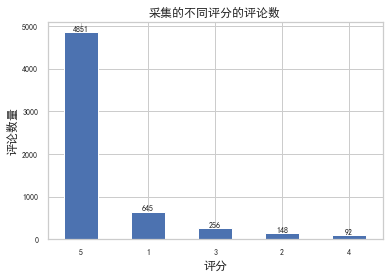

In [307]:
# 设置 seaborn 主题样式
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='whitegrid', rc=rc)
# 创建条形图
ax = score_num.plot(x='socre', y='id', kind='bar')
# 在每个条形上方显示具体的数字
for i, v in enumerate(score_num):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8)

# 添加标题和坐标轴标签
plt.title('采集的不同评分的评论数')
plt.xlabel('评分')
plt.ylabel('评论数量')
# 显示 x 轴和 y 轴
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# 设置 x 轴和 y 轴的标签可见性
ax.tick_params(axis='x', labelrotation=0, labelsize=8)
ax.tick_params(axis='y', labelsize=8)
# 设置背景透明
ax.patch.set_alpha(1)
plt.savefig(r'./img/评分的评论数量.svg',dpi=300)
# 显示图形
plt.show()

In [308]:
# 不同SKU的评分
comments_df.groupby(['SKU','sales_order']).agg({'score':'mean'}).sort_index(level='sales_order')

,,score
SKU,sales_order,
10028804239779,2,4.714013
10070743806818,4,4.388514
100010235018,6,4.000000
10071528305086,7,4.543933
10050679374521,11,4.039801
10072990560655,12,4.583333
100048486774,14,4.862069
100055936079,16,4.270655
10043344095804,17,4.297521


In [309]:
# 分省查看
province_df = comments_df.loc[comments_df['location']!='美国'].groupby(['location','score']).agg({'id':'count'}).sort_values(['location','score'],ascending=False)
# province_df.reset_index(inplace=True)
province_df

id
location score     
黑龙江      5        8
         4        1
         3        1
         1        1
青海       5        1
...             ...
上海       5      204
         4        5
         3       40
         2       11
         1       50

[116 rows x 1 columns]

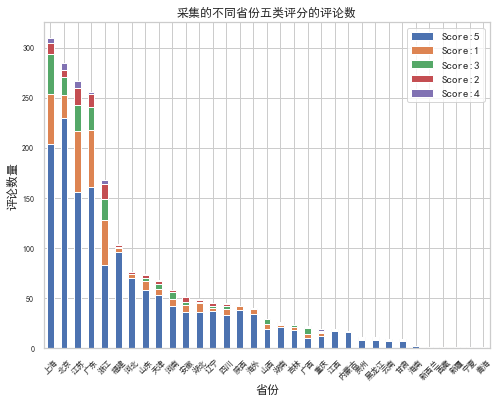

In [310]:
# 设置 seaborn 主题样式
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='whitegrid', rc=rc)
# 设置图表大小
fig, ax = plt.subplots(figsize=(8, 5))
# 对数据进行分组和求和
grouped = province_df.unstack()

# 按照数值大小进行排序
grouped = grouped.reindex(grouped.sum().sort_values(ascending=False).index, axis=1)

# 按照城市的总评论数量进行排序
sorted_cities = grouped.sum(axis=1).sort_values(ascending=False).index
grouped = grouped.reindex(sorted_cities)

# 绘制堆叠图
stacked = grouped.plot(kind='bar', stacked=True, figsize=(8, 6),ax=ax)

# 添加标题和坐标轴标签
plt.title('采集的不同省份五类评分的评论数')
plt.xlabel('省份')
plt.ylabel('评论数量')

# 修改图例
handles, labels = stacked.get_legend_handles_labels()
new_labels = [f'Score:{label[-2]}' for label in labels]
stacked.legend(handles, new_labels, loc='upper right')

# 设置 x 轴和 y 轴的标签可见性
ax.tick_params(axis='x', labelrotation=45, labelsize=8)
ax.tick_params(axis='y', labelsize=8)

# 设置背景透明
ax.patch.set_alpha(1)
plt.savefig(r'./img/不同省份五类评分的评论数量.svg',dpi=300)
# 显示图形
plt.show()

In [311]:
# 分日期查看
comments_df['sale_month'] = comments_df['creationTime'].str.slice(5,7)
comments_df['sale_year'] = comments_df['creationTime'].str.slice(0,4)
comments_df.head()

,id,guid,content,creationTime,isDelete,isTop,userImageUrl,topped,replyCount,score,...,SKU,sales_order,Unnamed: 0,Title,Description,Price,Image,Shop,sale_month,sale_year
0,19058365992,3a42ad2b13efd827680b403663445931,第一次在京东买水果，简直了，爱了爱了，包装很好，瓜果没有一点问题，拆开赶紧切了个西瓜?吃，皮...,2023-04-26 16:39:25,False,False,storage.360buyimg.com/i.imageUpload/e6a4e6a4bc...,0,0,5,...,100000263813,20,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023
1,19063662891,059df86d69f3033d82473f9a84d925de,西瓜足斤足两，到手后称了一下，将近4千克，很满意。切开后情况很好，瓜瓤很脆，吃起来脆甜脆甜的...,2023-04-28 14:18:46,False,False,storage.360buyimg.com/i.imageUpload/6a645f3433...,0,0,5,...,100000263813,20,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023
2,19027508331,aba66f4254a7b5b00f5750729e92e6e7,非常满意的一次购物体验，很甜！西瓜成熟度正好，口感脆甜可口，皮很薄，籽不多，分量足，包装完好...,2023-04-16 17:22:49,False,False,storage.360buyimg.com/i.imageUpload/6a645f6149...,0,1,5,...,100000263813,20,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023
3,19025228446,57419ebba5eabdb3035692ae06bb6b63,家里的水果都是京东买的，品质从来没有质疑过，已经是无限次回购的水果，家里人都很喜欢，京东的速...,2023-04-15 20:22:27,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,100000263813,20,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023
4,19098655478,b5d4417074b51b2cc41795937e49d610,京东自营商品质量有保证送货速度快，冷链物流送货保证新鲜，还有防撞空气袋特别安全，赶上活动价格...,2023-05-10 12:35:07,False,False,storage.360buyimg.com/i.imageUpload/6c6a737463...,0,0,5,...,100000263813,20,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,05,2023


In [312]:
# 将日期字符串转换为日期对象
comments_df['date'] = pd.to_datetime(comments_df['creationTime'])

# 创建星期几的新列
comments_df['weekday'] = comments_df['date'].apply(lambda x: x.weekday()+1)
comments_df

,id,guid,content,creationTime,isDelete,isTop,userImageUrl,topped,replyCount,score,...,Unnamed: 0,Title,Description,Price,Image,Shop,sale_month,sale_year,date,weekday
0,19058365992,3a42ad2b13efd827680b403663445931,第一次在京东买水果，简直了，爱了爱了，包装很好，瓜果没有一点问题，拆开赶紧切了个西瓜?吃，皮...,2023-04-26 16:39:25,False,False,storage.360buyimg.com/i.imageUpload/e6a4e6a4bc...,0,0,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-26 16:39:25,3
1,19063662891,059df86d69f3033d82473f9a84d925de,西瓜足斤足两，到手后称了一下，将近4千克，很满意。切开后情况很好，瓜瓤很脆，吃起来脆甜脆甜的...,2023-04-28 14:18:46,False,False,storage.360buyimg.com/i.imageUpload/6a645f3433...,0,0,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-28 14:18:46,5
2,19027508331,aba66f4254a7b5b00f5750729e92e6e7,非常满意的一次购物体验，很甜！西瓜成熟度正好，口感脆甜可口，皮很薄，籽不多，分量足，包装完好...,2023-04-16 17:22:49,False,False,storage.360buyimg.com/i.imageUpload/6a645f6149...,0,1,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-16 17:22:49,7
3,19025228446,57419ebba5eabdb3035692ae06bb6b63,家里的水果都是京东买的，品质从来没有质疑过，已经是无限次回购的水果，家里人都很喜欢，京东的速...,2023-04-15 20:22:27,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-15 20:22:27,6
4,19098655478,b5d4417074b51b2cc41795937e49d610,京东自营商品质量有保证送货速度快，冷链物流送货保证新鲜，还有防撞空气袋特别安全，赶上活动价格...,2023-05-10 12:35:07,False,False,storage.360buyimg.com/i.imageUpload/6c6a737463...,0,0,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,05,2023,2023-05-10 12:35:07,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,16476550154,14ea7072c6c9bd0f59d5f142ec3cf97b,此用户未填写评价内容,2021-10-17 20:13:03,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店,10,2021,2021-10-17 20:13:03,7
5988,16474162919,60808bb49082d36eedd6a356f14bc0c2,此用户未填写评价内容,2021-10-17 10:45:18,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店,10,2021,2021-10-17 10:45:18,7
5989,15732892943,27f24819f14c1062c9f8c30241b71275,此用户未填写评价内容,2021-05-29 15:09:01,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店,05,2021,2021-05-29 15:09:01,6
5990,15572078569,f1d9fa034649ba31f094fb10497c5c74,此用户未填写评价内容,2021-04-18 01:06:31,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店,04,2021,2021-04-18 01:06:31,7


In [313]:
# 按年统计
year_df = comments_df.value_counts(['sale_year'],ascending=True)
year_df

sale_year
2018           21
2019          127
2020          154
2021         1420
2022         1748
2023         2522
dtype: int64

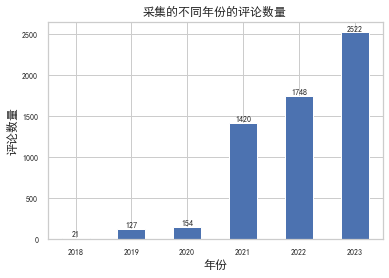

In [314]:
# 设置 seaborn 主题样式
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='whitegrid', rc=rc)

# 创建条形图
ax = year_df.plot(x='sale_year', y='data', kind='bar')
# 在每个条形上方显示具体的数字
for i, v in enumerate(year_df):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8)

# 添加标题和坐标轴标签
plt.title('采集的不同年份的评论数量')
plt.xlabel('年份')
plt.ylabel('评论数量')

# 设置 x 轴刻度和标签
plt.xticks(range(len(year_df)), ['2018', '2019', '2020', '2021', '2022', '2023'])
# 设置 x 轴和 y 轴的标签可见性
ax.tick_params(axis='x', labelrotation=0, labelsize=8)
ax.tick_params(axis='y', labelsize=8)
# 设置背景透明
ax.patch.set_alpha(1)
plt.savefig(r'./img/年份的评论数量.svg',dpi=300)
# 显示图形
plt.show()

In [317]:
# 月份绘图
month_df = comments_df.loc[comments_df.sale_year != '2023'].value_counts(['sale_month'])
month_df = month_df.reset_index()
month_df

,sale_month,0
0,04,728
1,06,712
2,05,696
3,07,317
4,10,256
5,11,201
6,08,193
7,12,107
8,09,95
9,03,80


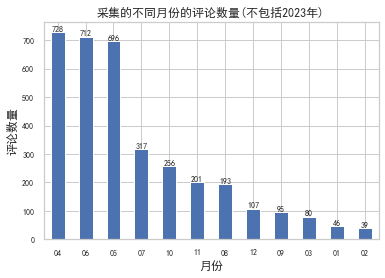

In [318]:
# 设置 seaborn 主题样式
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='whitegrid', rc=rc)

# 创建条形图
ax = month_df.plot(x='sale_month', y=0, kind='bar')
# 在每个条形上方显示具体的数字
for i, v in enumerate(month_df[0]):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8)

# 添加标题和坐标轴标签
plt.title('采集的不同月份的评论数量(不包括2023年)')
plt.xlabel('月份')
plt.ylabel('评论数量')


# 设置 x 轴和 y 轴的标签可见性
ax.tick_params(axis='x', labelrotation=0, labelsize=8)
ax.tick_params(axis='y', labelsize=8)

# 隐藏图例
ax.legend().set_visible(False)
# 设置背景透明
ax.patch.set_alpha(1)
plt.savefig(r'./img/不同月份的评论数量.svg',dpi=300)
# 显示图形
plt.show()

In [319]:
# 周几绘图
week_df = comments_df.loc[comments_df.sale_year != '2023'].value_counts(['weekday'])
week_df = week_df.reset_index()
week_df

,weekday,0
0,6,547
1,1,517
2,5,512
3,3,509
4,7,471
5,2,465
6,4,449


In [320]:
week_df.weekday

0    6
1    1
2    5
3    3
4    7
5    2
6    4
Name: weekday, dtype: int64

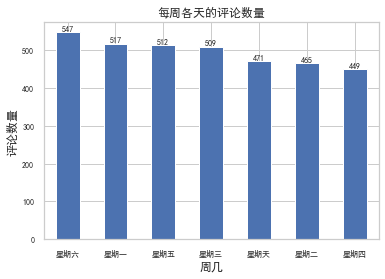

In [321]:
# 设置 seaborn 主题样式
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='whitegrid', rc=rc)

# 创建星期几的字典映射
weekday_dict = {
    '1': '星期一',
    '2': '星期二',
    '3': '星期三',
    '4': '星期四',
    '5': '星期五',
    '6': '星期六',
    '7': '星期天'
}
# 创建条形图
ax = week_df.plot(x='weekday', y=0, kind='bar')
# 在每个条形上方显示具体的数字
for i, v in enumerate(week_df[0]):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8)

# 添加标题和坐标轴标签
plt.title('每周各天的评论数量')
plt.xlabel('周几')
plt.ylabel('评论数量')
# 将x轴的标签替换为星期几
# 设置 x 轴刻度和标签
plt.xticks(range(len(week_df)), week_df['weekday'].astype(str).map(weekday_dict))

# 设置 x 轴和 y 轴的标签可见性
ax.tick_params(axis='x', labelrotation=0, labelsize=8)
ax.tick_params(axis='y', labelsize=8)

# 隐藏图例
ax.legend().set_visible(False)
# 设置背景透明
ax.patch.set_alpha(1)
plt.savefig(r'./img/每周各天评论数量.svg',dpi=300)
# 显示图形
plt.show()

## 绘图

In [322]:
comments_df.head()

,id,guid,content,creationTime,isDelete,isTop,userImageUrl,topped,replyCount,score,...,Unnamed: 0,Title,Description,Price,Image,Shop,sale_month,sale_year,date,weekday
0,19058365992,3a42ad2b13efd827680b403663445931,第一次在京东买水果，简直了，爱了爱了，包装很好，瓜果没有一点问题，拆开赶紧切了个西瓜?吃，皮...,2023-04-26 16:39:25,False,False,storage.360buyimg.com/i.imageUpload/e6a4e6a4bc...,0,0,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-26 16:39:25,3
1,19063662891,059df86d69f3033d82473f9a84d925de,西瓜足斤足两，到手后称了一下，将近4千克，很满意。切开后情况很好，瓜瓤很脆，吃起来脆甜脆甜的...,2023-04-28 14:18:46,False,False,storage.360buyimg.com/i.imageUpload/6a645f3433...,0,0,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-28 14:18:46,5
2,19027508331,aba66f4254a7b5b00f5750729e92e6e7,非常满意的一次购物体验，很甜！西瓜成熟度正好，口感脆甜可口，皮很薄，籽不多，分量足，包装完好...,2023-04-16 17:22:49,False,False,storage.360buyimg.com/i.imageUpload/6a645f6149...,0,1,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-16 17:22:49,7
3,19025228446,57419ebba5eabdb3035692ae06bb6b63,家里的水果都是京东买的，品质从来没有质疑过，已经是无限次回购的水果，家里人都很喜欢，京东的速...,2023-04-15 20:22:27,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-15 20:22:27,6
4,19098655478,b5d4417074b51b2cc41795937e49d610,京东自营商品质量有保证送货速度快，冷链物流送货保证新鲜，还有防撞空气袋特别安全，赶上活动价格...,2023-05-10 12:35:07,False,False,storage.360buyimg.com/i.imageUpload/6c6a737463...,0,0,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,05,2023,2023-05-10 12:35:07,3


In [324]:
# 使用jieba进行分词,统计词频
score = 1
comments_list = comments_df.loc[comments_df.score == 1]['content'].to_list()
seg_list = [jieba.lcut(comment) for comment in comments_list]
# 过滤出长度大于一的字符
filtered_words = [word for seq in seg_list for word in seq if len(word) > 1]
# 统计词频
word_counts = Counter(filtered_words)
word_counts['hellip'] =0
word_counts.most_common(50)

[('西瓜', 274),
 ('没有', 105),
 ('评价', 105),
 ('内容', 94),
 ('用户', 93),
 ('未填写', 93),
 ('一点', 75),
 ('京东', 58),
 ('好吃', 57),
 ('难吃', 57),
 ('不甜', 56),
 ('客服', 53),
 ('一个', 51),
 ('差评', 51),
 ('收到', 45),
 ('这个', 44),
 ('味道', 44),
 ('这么', 42),
 ('非常', 38),
 ('不要', 37),
 ('麒麟', 37),
 ('还是', 36),
 ('不是', 35),
 ('商家', 35),
 ('新鲜', 34),
 ('售后', 33),
 ('口感', 32),
 ('大家', 32),
 ('垃圾', 31),
 ('根本', 30),
 ('什么', 29),
 ('东西', 29),
 ('问题', 27),
 ('没熟', 27),
 ('不好', 26),
 ('水果', 26),
 ('知道', 26),
 ('真的', 26),
 ('购买', 26),
 ('快递', 25),
 ('就是', 25),
 ('第一次', 24),
 ('不能', 24),
 ('一样', 23),
 ('两个', 23),
 ('完全', 23),
 ('不会', 22),
 ('这样', 21),
 ('切开', 20),
 ('而且', 20)]

[('西瓜', 274),
 ('没有', 105),
 ('评价', 105),
 ('内容', 94),
 ('用户', 93),
 ('未填写', 93),
 ('一点', 75),
 ('京东', 58),
 ('好吃', 57),
 ('难吃', 57),
 ('不甜', 56),
 ('客服', 53),
 ('一个', 51),
 ('差评', 51),
 ('收到', 45),
 ('这个', 44),
 ('味道', 44),
 ('这么', 42),
 ('非常', 38),
 ('不要', 37),
 ('麒麟', 37),
 ('还是', 36),
 ('不是', 35),
 ('商家', 35),
 ('新鲜', 34),
 ('售后', 33),
 ('口感', 32),
 ('大家', 32),
 ('垃圾', 31),
 ('根本', 30),
 ('什么', 29),
 ('东西', 29),
 ('问题', 27),
 ('没熟', 27),
 ('不好', 26),
 ('水果', 26),
 ('知道', 26),
 ('真的', 26),
 ('购买', 26),
 ('快递', 25),
 ('就是', 25),
 ('第一次', 24),
 ('不能', 24),
 ('一样', 23),
 ('两个', 23),
 ('完全', 23),
 ('不会', 22),
 ('这样', 21),
 ('切开', 20),
 ('而且', 20)]

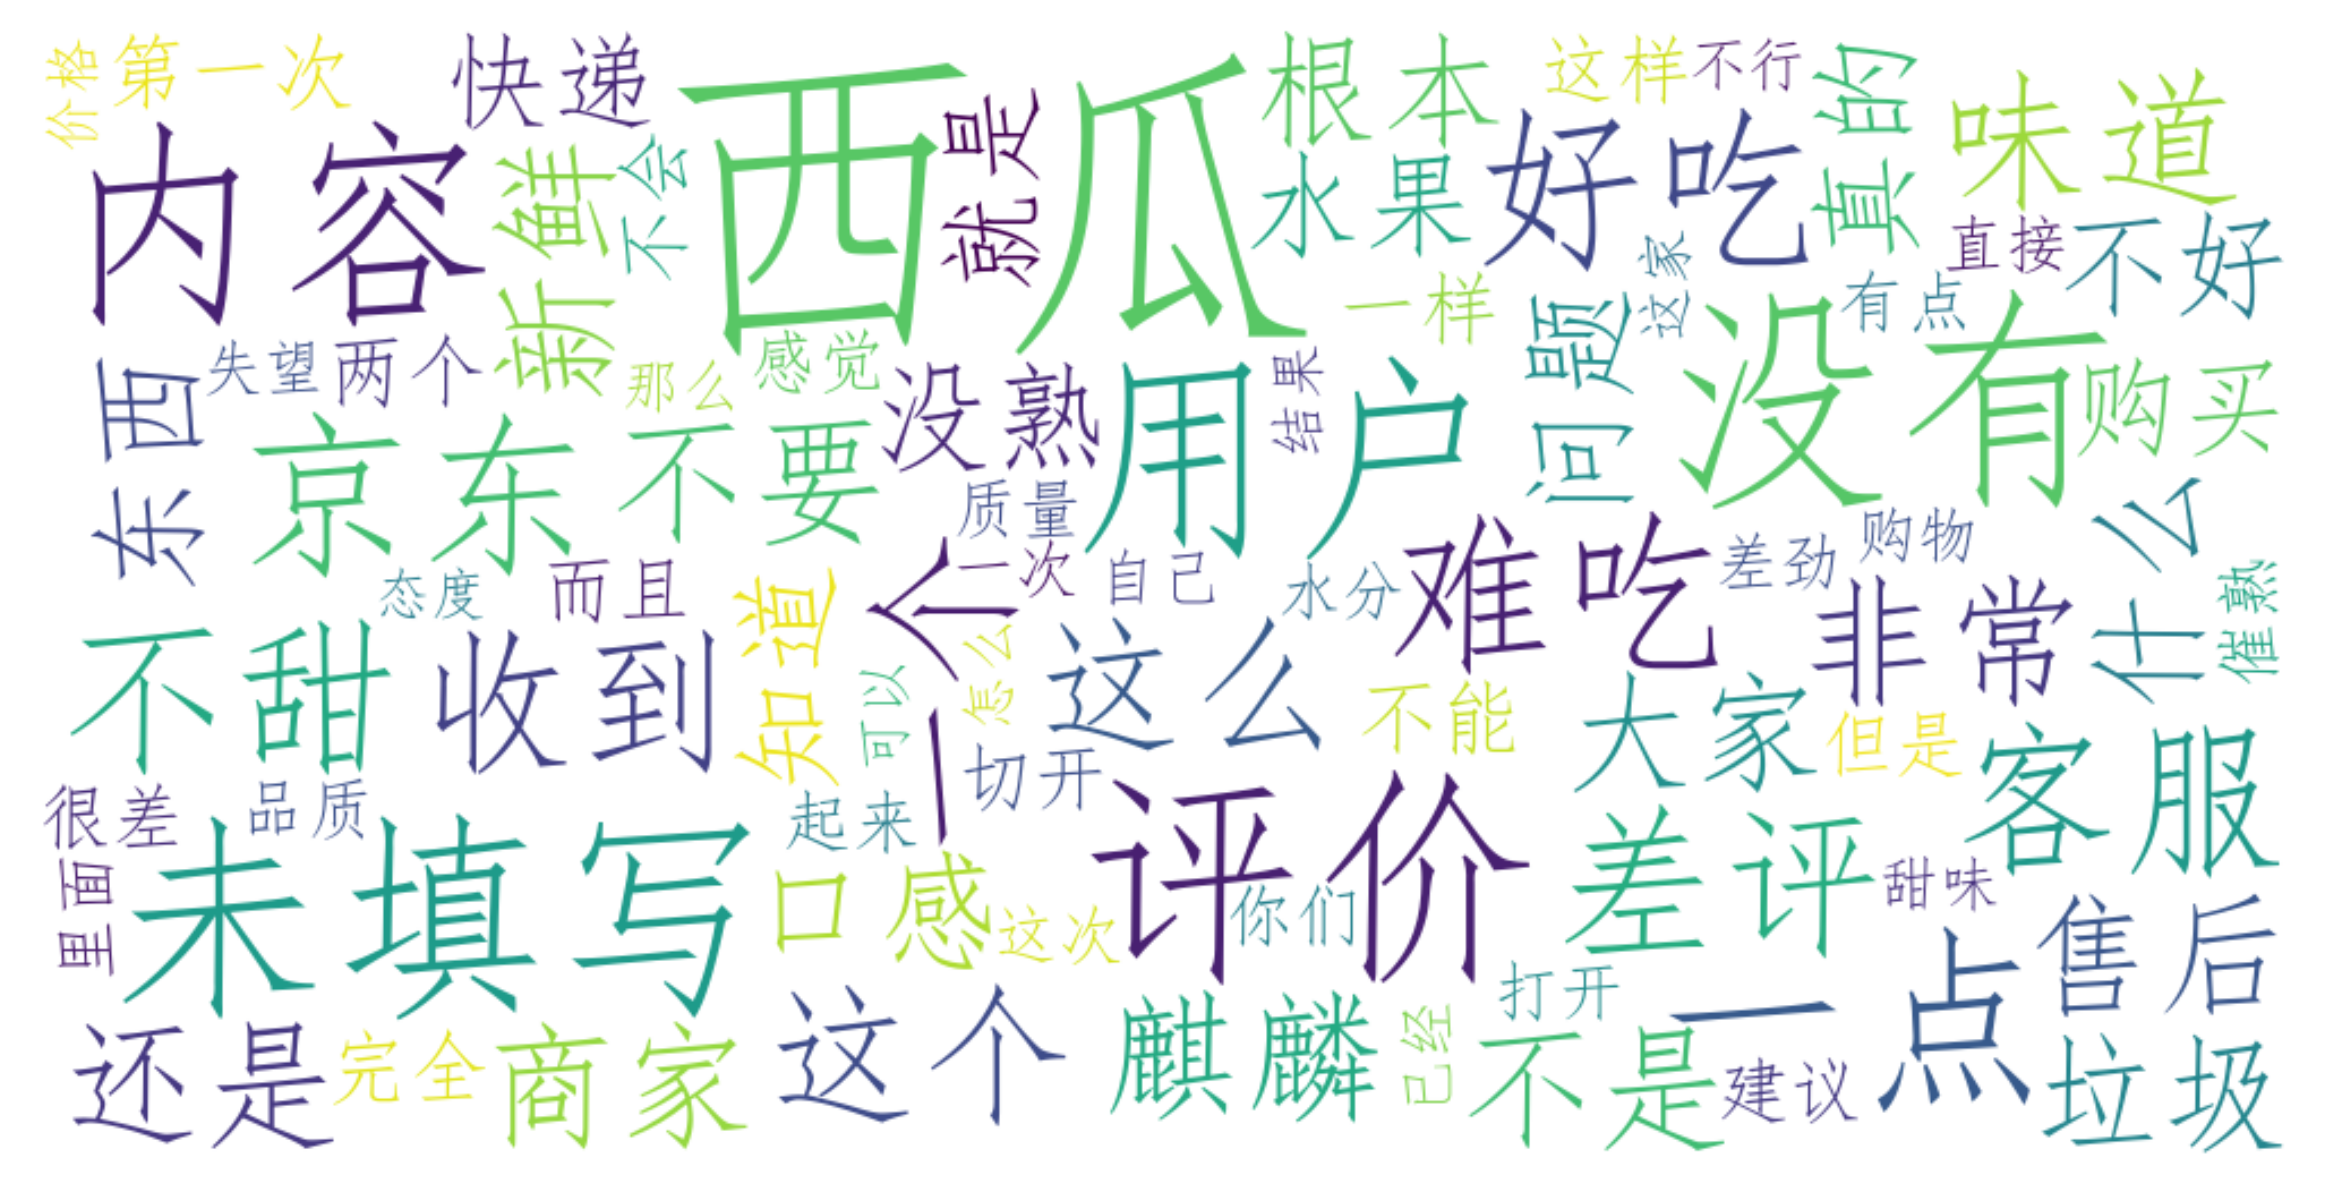

In [325]:
# 不同评分的词云图


# 创建WordCloud对象，并设置参数
wordcloud = WordCloud(font_path=r'C:\Windows\Fonts\simfang.ttf', width=1000, height=500, background_color='white', colormap='viridis', max_words=80, max_font_size=150, random_state=42)

# 生成词云图
wordcloud.generate_from_frequencies(word_counts)

# Convert the WordCloud object to SVG format
svg_content = wordcloud.to_svg()

# Save the SVG content to a file
with open('./img/词云.svg', 'w', encoding='utf-8') as f:
    f.write(svg_content)

# 绘制词云图
plt.figure(figsize=(10, 5), dpi=300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# 保存为本地SVG图像文件
plt.show()

In [340]:
def plot_wordcloud(comments_list, save_path, pos_tags=None):
    # 加载形状图片
    # mask_image = np.array(Image.open(mask_image_path))
    seg_list = [jp.lcut(comment) for comment in comments_list]
    # 过滤出长度大于一的字符，并根据指定词性进行过滤
    filtered_words = []
    for seq in seg_list:
        for word, pos in seq:
            if len(word) > 1 and (pos_tags is None or pos in pos_tags):
                filtered_words.append(word)
    # 统计词频
    word_counts = Counter(filtered_words)
    word_counts['hellip'] = 0
    word_counts['柠檬'] = 0
    # 不同评分的词云图
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

    # 创建WordCloud对象，并设置参数
    wordcloud = WordCloud(font_path=r'C:\Windows\Fonts\simfang.ttf', width=800, height=400, background_color='white', colormap='viridis', max_words=80, max_font_size=150, random_state=42)

    # 生成词云图
    wordcloud.generate_from_frequencies(word_counts)

    # Convert the WordCloud object to SVG format
    svg_content = wordcloud.to_svg()

    # Save the SVG content to a file
    with open(save_path, 'w', encoding='utf-8') as f:
        f.write(svg_content)
    # 绘制词云图
    plt.figure(figsize=(10, 5), dpi=500)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    # 保存为本地SVG图像文件
    # plt.savefig(save_path, dpi=500)
    plt.close()

In [341]:
# pos_tags = {'a': '形容词', 'n': '名词', 'v': '动词', 'd': '副词', 's': '情感词', 'r': '代词'}
for score in range(1,6):
    comments_list = comments_df.loc[comments_df.score == score]['content'].to_list()
    save_path = rf'./img/{score}_词云.svg'
    plot_wordcloud(comments_list,save_path,pos_tags=['a','n','s','v'])

In [342]:
# 西瓜裂开的图片
comments_df

,id,guid,content,creationTime,isDelete,isTop,userImageUrl,topped,replyCount,score,...,Unnamed: 0,Title,Description,Price,Image,Shop,sale_month,sale_year,date,weekday
0,19058365992,3a42ad2b13efd827680b403663445931,第一次在京东买水果，简直了，爱了爱了，包装很好，瓜果没有一点问题，拆开赶紧切了个西瓜?吃，皮...,2023-04-26 16:39:25,False,False,storage.360buyimg.com/i.imageUpload/e6a4e6a4bc...,0,0,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-26 16:39:25,3
1,19063662891,059df86d69f3033d82473f9a84d925de,西瓜足斤足两，到手后称了一下，将近4千克，很满意。切开后情况很好，瓜瓤很脆，吃起来脆甜脆甜的...,2023-04-28 14:18:46,False,False,storage.360buyimg.com/i.imageUpload/6a645f3433...,0,0,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-28 14:18:46,5
2,19027508331,aba66f4254a7b5b00f5750729e92e6e7,非常满意的一次购物体验，很甜！西瓜成熟度正好，口感脆甜可口，皮很薄，籽不多，分量足，包装完好...,2023-04-16 17:22:49,False,False,storage.360buyimg.com/i.imageUpload/6a645f6149...,0,1,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-16 17:22:49,7
3,19025228446,57419ebba5eabdb3035692ae06bb6b63,家里的水果都是京东买的，品质从来没有质疑过，已经是无限次回购的水果，家里人都很喜欢，京东的速...,2023-04-15 20:22:27,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-15 20:22:27,6
4,19098655478,b5d4417074b51b2cc41795937e49d610,京东自营商品质量有保证送货速度快，冷链物流送货保证新鲜，还有防撞空气袋特别安全，赶上活动价格...,2023-05-10 12:35:07,False,False,storage.360buyimg.com/i.imageUpload/6c6a737463...,0,0,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,05,2023,2023-05-10 12:35:07,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,16476550154,14ea7072c6c9bd0f59d5f142ec3cf97b,此用户未填写评价内容,2021-10-17 20:13:03,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店,10,2021,2021-10-17 20:13:03,7
5988,16474162919,60808bb49082d36eedd6a356f14bc0c2,此用户未填写评价内容,2021-10-17 10:45:18,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店,10,2021,2021-10-17 10:45:18,7
5989,15732892943,27f24819f14c1062c9f8c30241b71275,此用户未填写评价内容,2021-05-29 15:09:01,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店,05,2021,2021-05-29 15:09:01,6
5990,15572078569,f1d9fa034649ba31f094fb10497c5c74,此用户未填写评价内容,2021-04-18 01:06:31,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店,04,2021,2021-04-18 01:06:31,7


In [329]:
bad_watermelon = comments_df.loc[(comments_df.content.str.contains('裂开')) & (comments_df.score == 1)]
bad_watermelon

,id,guid,content,creationTime,isDelete,isTop,userImageUrl,topped,replyCount,score,...,Unnamed: 0,Title,Description,Price,Image,Shop,sale_month,sale_year,date,weekday
1000,19090132099,762b1cba17cd962b144b41bd3d54fe43,收到我整个无语了，京东的质量堪忧，一收到整个裂开了&hellip;还这么离谱的裂开&hell...,2023-05-07 14:48:35,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,1,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,05,2023,2023-05-07 14:48:35,7
1014,19072108225,b741e5151f5a0375b240a06ac721a279,这一批的西瓜非常不好，果肉硬，还不太新鲜的口感。并且里面包了袋子，西瓜裂开了也没发现，等过了...,2023-05-01 07:35:23,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,1,1,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,05,2023,2023-05-01 07:35:23,1
1055,19088509139,710edb35dc6a7d64fdcec3ea0e5d8d39,西瓜是裂开来的,2023-05-06 21:48:27,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,1,1,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,05,2023,2023-05-06 21:48:27,6
1066,19059917492,5e4a42571abd08fb23761bb4bb1cdc61,两天自己裂开了，问题是你不知道什么时候裂开的,2023-04-27 09:02:12,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,1,1,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-27 09:02:12,4
1115,19102508345,3cdc7e4ec92a5a1a28f9f8d2731d6743,裂开了,2023-05-11 17:55:34,False,False,storage.360buyimg.com/i.imageUpload/6c6f7665d8...,0,1,1,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,05,2023,2023-05-11 17:55:34,4
4392,18720898400,4f4799f5e3ca73775da2558accce7177,一个瓜熟透了，一个瓜裂开不说，还已经发臭了,2023-01-24 23:01:18,False,False,storage.360buyimg.com/i.imageUpload/6a645f6442...,0,0,1,...,10,西瓜内部黑籽或者白籽根据季节月份而定,丸宠海南麒麟小蜜蜂西瓜当季新鲜水果 1个装(5-6斤)防摔包装 京鲜云仓直发,35.9,//img11.360buyimg.com/n7/jfs/t1/168329/10/2330...,真鲜植采（宿迁）水果专营店,01,2023,2023-01-24 23:01:18,2


In [335]:
downloaded_img = os.listdir('./img/comments')
downloaded_img = [i.split('-')[0] for i in downloaded_img]
for item_idx,row in bad_watermelon.iterrows():
    if (row['imageCount'] > 0) and (str(row['id']) not in downloaded_img):
        json_iamges = ast.literal_eval(row['images'])
        for idx,item in enumerate(json_iamges):
            img_url = 'https:' + item['imgUrl']  # 构造完整的图像URL
            filename = os.path.basename(f'{row["id"]}-{idx}.jpg')  # 从URL中提取文件名
            save_path = os.path.join('./img/comments', filename)  # 图像保存的路径
            # 下载图像并保存到本地文件
            urllib.request.urlretrieve(img_url, save_path)
            print(f"{item_idx},Image '{filename}' saved to '{save_path}'.")

1000,Image '19090132099-0.jpg' saved to './img/comments\19090132099-0.jpg'.
1000,Image '19090132099-1.jpg' saved to './img/comments\19090132099-1.jpg'.
1014,Image '19072108225-0.jpg' saved to './img/comments\19072108225-0.jpg'.
1014,Image '19072108225-1.jpg' saved to './img/comments\19072108225-1.jpg'.
1055,Image '19088509139-0.jpg' saved to './img/comments\19088509139-0.jpg'.
1115,Image '19102508345-0.jpg' saved to './img/comments\19102508345-0.jpg'.


In [336]:
good_comments = comments_df.loc[(comments_df.content.str.contains('包装')) & (comments_df.score == 5)]
good_comments

,id,guid,content,creationTime,isDelete,isTop,userImageUrl,topped,replyCount,score,...,Unnamed: 0,Title,Description,Price,Image,Shop,sale_month,sale_year,date,weekday
0,19058365992,3a42ad2b13efd827680b403663445931,第一次在京东买水果，简直了，爱了爱了，包装很好，瓜果没有一点问题，拆开赶紧切了个西瓜?吃，皮...,2023-04-26 16:39:25,False,False,storage.360buyimg.com/i.imageUpload/e6a4e6a4bc...,0,0,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-26 16:39:25,3
2,19027508331,aba66f4254a7b5b00f5750729e92e6e7,非常满意的一次购物体验，很甜！西瓜成熟度正好，口感脆甜可口，皮很薄，籽不多，分量足，包装完好...,2023-04-16 17:22:49,False,False,storage.360buyimg.com/i.imageUpload/6a645f6149...,0,1,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-16 17:22:49,7
6,19069676284,3d6089a2c4f3d1f05cc54ee1085617f7,夏天到了，就想吃一些好吃的水果，就在京东自营水果店里买了一些水果，水果包装的都很好，水果吃起...,2023-04-30 07:51:10,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-30 07:51:10,7
8,19049914192,7199e3e5459a00508e5be198476b9e38,西瓜包装的非常到位，纸盒加气泡柱非常安全。最重的6kg，小的3.6kg。西瓜非常新鲜，瓜蒂很...,2023-04-23 19:32:08,False,False,storage.360buyimg.com/i.imageUpload/786561726f...,0,0,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-23 19:32:08,7
9,19042691794,284eee8b928fd978bbf3802247f3889f,①收到货，第一时间拆包装，质量非常好，与卖家描述一致，完全超出我的期望值，包装很仔细、严实，...,2023-04-21 19:43:56,False,False,storage.360buyimg.com/i.imageUpload/c1f5d7cfde...,0,0,5,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-21 19:43:56,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,15561814801,c178fe841a9f5359b99c62ddf4c6dba7,真空包装，外包装也严谨，希望能好吃,2021-04-16 09:54:47,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店,04,2021,2021-04-16 09:54:47,5
5418,15561490973,7319248f4e8e697fc2758e4bd48ae82c,这次速度快，包装也OK~,2021-04-16 08:13:21,False,False,storage.360buyimg.com/i.imageUpload/617374726f...,0,0,5,...,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店,04,2021,2021-04-16 08:13:21,5
5437,15539283872,dfe9d073906a246d457a4397bbf53dad,参加东东农场活动获得的免费一公斤虾稻米，物流快，包装完好，基本没啥碎米。,2021-04-13 02:14:42,False,False,storage.360buyimg.com/i.imageUpload/796979696c...,0,0,5,...,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店,04,2021,2021-04-13 02:14:42,2
5647,16545227921,43fa7fbad518c09cf798285e37deca30,包装一般，还算可以吧,2021-10-31 09:52:19,False,False,storage.360buyimg.com/i.imageUpload/b4f3b4f3b5...,0,0,5,...,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店,10,2021,2021-10-31 09:52:19,7


In [338]:
downloaded_img = os.listdir('./img/good_comments')
downloaded_img = [i.split('-')[0] for i in downloaded_img]
for item_idx,row in good_comments.iloc[:10,:].iterrows():
    if (row['imageCount'] > 0) and (str(row['id']) not in downloaded_img):
        json_iamges = ast.literal_eval(row['images'])
        for idx,item in enumerate(json_iamges):
            img_url = 'https:' + item['imgUrl']  # 构造完整的图像URL
            filename = os.path.basename(f'{row["id"]}-{idx}.jpg')  # 从URL中提取文件名
            save_path = os.path.join('./img/good_comments', filename)  # 图像保存的路径
            # 下载图像并保存到本地文件
            urllib.request.urlretrieve(img_url, save_path)
            print(f"{item_idx},Image '{filename}' saved to '{save_path}'.")

0,Image '19058365992-0.jpg' saved to './img/good_comments\19058365992-0.jpg'.
0,Image '19058365992-1.jpg' saved to './img/good_comments\19058365992-1.jpg'.
0,Image '19058365992-2.jpg' saved to './img/good_comments\19058365992-2.jpg'.
0,Image '19058365992-3.jpg' saved to './img/good_comments\19058365992-3.jpg'.
0,Image '19058365992-4.jpg' saved to './img/good_comments\19058365992-4.jpg'.
0,Image '19058365992-5.jpg' saved to './img/good_comments\19058365992-5.jpg'.
2,Image '19027508331-0.jpg' saved to './img/good_comments\19027508331-0.jpg'.
2,Image '19027508331-1.jpg' saved to './img/good_comments\19027508331-1.jpg'.
6,Image '19069676284-0.jpg' saved to './img/good_comments\19069676284-0.jpg'.
6,Image '19069676284-1.jpg' saved to './img/good_comments\19069676284-1.jpg'.
6,Image '19069676284-2.jpg' saved to './img/good_comments\19069676284-2.jpg'.
6,Image '19069676284-3.jpg' saved to './img/good_comments\19069676284-3.jpg'.
6,Image '19069676284-4.jpg' saved to './img/good_comments\190696

In [339]:
comments_df.loc[(comments_df.score == 2)]

,id,guid,content,creationTime,isDelete,isTop,userImageUrl,topped,replyCount,score,...,Unnamed: 0,Title,Description,Price,Image,Shop,sale_month,sale_year,date,weekday
1208,19061575487,c4131842b044e8477c7a84739b752ed4,皮厚，而且还一点都不甜,2023-04-27 18:34:51,False,False,storage.360buyimg.com/i.imageUpload/6a645f3764...,0,1,2,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-27 18:34:51,4
1209,19044741994,63dd64c9e9b4a1479dcd1d485c66b62d,这个季节大概不适合吃西瓜吧，京东的售后倒是一如既往的好,2023-04-22 15:03:51,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,1,2,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-22 15:03:51,6
1213,19078823764,2133c4bbf458e78686a3fc46721efb4a,当天到了就开了一个，瓜肉较硬，甜。第三天想开第二个，结果瓜藤那边有点发霉，家人直接扔了，没和...,2023-05-03 17:17:19,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,1,2,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,05,2023,2023-05-03 17:17:19,3
1221,19051996730,2f60eb2b8b8bd7d1b486ca507a40846f,活动买了三个，一个5斤多点，一个6斤多点，一个8斤多点，比我们这超市卖的便宜，但是口感真的不...,2023-04-24 14:23:54,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,1,2,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-24 14:23:54,1
1225,19107147632,ae377c11523ae50481937c99ab84f2ce,说实话，不值这个价。还不如线下买的花瓜好吃！,2023-05-13 11:29:01,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,2,...,19,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,05,2023,2023-05-13 11:29:01,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,16499992212,59703333a5870e0e6f5f3fa14126246f,第一次收到一点柠檬味都没有的柠檬，橘子不像橘子，柠檬不像柠檬，不知道是什么品种，太失望。,2021-10-22 12:01:37,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,2,...,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店,10,2021,2021-10-22 12:01:37,5
5684,16861401930,65a1b53ab96b10fee1ba216316ead034,假柠檬吗&hellip;,2021-12-23 13:51:52,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,2,...,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店,12,2021,2021-12-23 13:51:52,4
5689,19072853431,fefecf387ab43f661d71fe89a609317f,购买前特地询问是否是黑子西瓜，回答肯定后购买的，收到后是白子少量，销售不能这样讲话，东西可以...,2023-05-01 13:13:51,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,2,...,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店,05,2023,2023-05-01 13:13:51,1
5735,16705000908,38972bac1df03bf255f190fdfb11369f,全箱就2个新果，其他都长黑点了，放置时间较长，鉴定完毕,2021-11-22 20:34:42,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,2,...,1,头茬鲜果，泡沫卡槽箱包装，精选阳面瓜，一瓜一藤，不仅脆而且甜，入口化进心里，留不住的夏天就吃掉,京愿 新鲜8424麒麟西瓜 现摘甜心新鲜大西瓜麒麟西瓜当季应季水果生鲜 优选4-5斤（托盘保护）,32.8,//img14.360buyimg.com/n7/jfs/t1/97570/19/37945...,荣鼎生鲜专营店,11,2021,2021-11-22 20:34:42,1
